In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("180624-2.csv")
df

,date,strain,time,rapa,number,dots,cells,condition
0,180624,910,0,0,1,2,33,1
1,180624,910,0,0,1,0,35,1
2,180624,910,0,0,1,3,55,1
3,180624,910,0,0,1,2,40,1
4,180624,910,0,0,2,3,57,1
5,180624,910,0,0,2,5,51,1
6,180624,910,0,0,2,1,48,1
7,180624,910,0,0,2,3,41,1
8,180624,910,120,0,1,5,46,2
9,180624,910,120,0,1,9,43,2


In [3]:
df.columns

Index(['date', 'strain', 'time', 'rapa', 'number', 'dots', 'cells',
       'condition'],
      dtype='object')

In [4]:
# calculate SE / cells (%)
df_number = df.groupby(["condition", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,condition,number,date,strain,time,rapa,dots,cells,SE
0,1,1,722496,3640,0,0,7,163,4.294479
1,1,2,722496,3640,0,0,12,197,6.091371
2,1,3,571872,2730,0,0,6,132,4.545455
3,2,1,722496,3640,480,0,30,160,18.750000
4,2,2,722496,3640,480,0,48,251,19.123506
5,2,3,571872,2730,360,0,28,179,15.642458
6,3,1,722496,3640,480,800,6,179,3.351955
7,3,2,541872,2730,360,600,14,165,8.484848
8,3,3,571872,2730,360,600,9,160,5.625000


In [5]:
# calculate mean and SEM for each condition
SE_mean = df_number.groupby("condition").mean()["SE"]
SE_sem = df_number.groupby("condition").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

condition
1     4.977101
2    17.838655
3     5.820601
Name: SE, dtype: float64
[0.56182571 1.10337909 1.48496274]


## Paired t-test

In [6]:
SE_1 = df_number[df_number["condition"] == 2]["SE"]
SE_2 = df_number[df_number["condition"] == 3]["SE"]
statistic, rapa_pvalue = stats.ttest_rel(SE_1, SE_2)
rapa_pvalue

0.01941652027135113

## data visualization

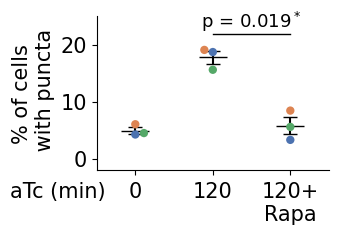

In [7]:
fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
sns.swarmplot(x="condition", y="SE", data=df_number, hue = "number", palette="deep", size=6)
ax.errorbar(x=[0, 1, 2], y=SE_mean, yerr=SE_sem, capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fontsize=15
x_height = -4
ax.text(0, x_height, "0", ha="center", fontsize=fontsize, verticalalignment='top')
ax.text(1, x_height, "120", ha="center", fontsize=fontsize, verticalalignment='top')
ax.text(2, x_height, "120+\nRapa", ha="center", fontsize=fontsize, verticalalignment='top')

ax.text(-1, x_height, "aTc (min)", ha="center", fontsize=fontsize, verticalalignment='top')


ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-2, 25)

ax.plot([1, 2], [22, 22], color='k', lw=1)
ax.text(1.5, 23, f'p = {rapa_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)

ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_yticks([0, 10, 20])
ax.set_yticklabels(["0", "10", "20"], fontsize=15)
ax.set_ylabel("% of cells\n with puncta", fontsize=15, loc="center")

ax.legend().remove()
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()